
# Project: Investigating factors of showing up appoinment of many patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
>The dataset contains factors per each patient that may help in the investigation.

### Data Dictionary
>
>01- PatientId:
>Identification of a patient
>
>02- AppointmentID:
>Identification of each appointment
>
>03- Gender:
>Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
>
>04- ScheduledDay:
>The day someone called or registered the appointment, this is before appointment of course.
>
>05- AppointmentDay;
>The day of the actuall appointment, when they have to visit the doctor.
>
>06- Age:
>How old is the patient.
>
>07- Neighbourhood:
>Where the appointment takes place.
>
>08- Scholarship;
>True of False . Observation, this is a broad topic, consider reading this article
https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
>
>09- Hipertension;
>True or False
>
>10- Diabetes:
>True or False
>
>11- Alcoholism:
>True or False
>
>12- Handcap:
>True or False
>
>13- SMS_received:
>1 or more messages sent to the patient.
>
>14- No-show:
>True or False. No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

#### Questions to answer:
>1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime,timedelta

<a id='wrangling'></a>
## Data Wrangling

> **Process**: In this section of the report, the data will load and check for cleanliness.

> **Steps used:**
>>1. Load the data and visualize the first rows.
>>2. Check for missing values (NaN), correct datatypes and column names.
>>3. Check for duplicated samples (rows).
>>4. Check unique values per each column and compare it with the Data dictionary.
>>5. Check the age column values between 0 and 100.
>>6. Check if scheduled day is always earlier than appointment date.
>>7. Check if the age between 0-2 years and the patient is classified as Alcoholism.
>>8. Check if the patient_id has always unique gender.

>**Results:** At end of the process.

#### 1. Load the data and visualize the first rows

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#load data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#get the datafram shape
print('The dataset has ({}) rows and ({}) columns.'.format(df.shape[0],df.shape[1]))

The dataset has (110527) rows and (14) columns.


**Let us fix the columns name first to use properly the codes as per python recommendations**

In [4]:
df.rename(columns={'PatientId':'Patient_Id','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','No-show':'No_show'}, inplace=True)
df.rename(columns= lambda x: x.lower(), inplace =True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

#### 2. Check for missing values (NaN), correct datatypes and column names.

In [5]:
#2. Check null values, data types and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 3. Check for duplicated samples (rows)

In [6]:
#check dupplicated rows
'No duplicates' if df.duplicated().sum()==0 else "There is duplicates, the no is {}".format(df.duplicated().sum()) 

'No duplicates'

#### 4. Check unique values per each column and compare it with the Data dictionary

In [7]:
#check unique values per each column
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

In [8]:
#Check how many Handcap per each value
df.handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

#### 5. Check the age column values between 0 and 100.

In [9]:
#check age in range of >0 and <100
age_over_100=df.query('age > 100').shape[0]
age_neg_value=df.query('age < 0').shape[0]
print ('The no of age in dataset over 100 is ({}), while under 0 is ({}).'.format(age_over_100, age_neg_value))

The no of age in dataset over 100 is (7), while under 0 is (1).


Assuming that 0 is the age between 0-1 year, so ther row under 0 will be dropped only

#### 6. Check if scheduled day is always earlier than appointment date.

In [10]:
# check if the scheduled date is earlier than appointment date in all dataset
sch_day_dt=pd.to_datetime(df['scheduled_day'], format="%Y-%m-%dT%H:%M:%SZ")
app_day_dt=pd.to_datetime(df['appointment_day'], format="%Y-%m-%dT%H:%M:%SZ")
df['duration']=(app_day_dt-sch_day_dt).dt.total_seconds().astype(int)
neg_duration_count=df.query('duration <0').shape[0]
neg_duration_percentage=round(df.query('duration <0').shape[0]/df.shape[0]*100, 2)
print('The dataframe has ({}) negative values in duration with ({})% of dataset'.format(neg_duration_count,neg_duration_percentage))

The dataframe has (38568) negative values in duration with (34.89)% of dataset


let's convert scheduled day and appointment day from string to datetime

In [11]:
#convert scheduled day and appointment day from string to datetime
df['scheduled_day']=sch_day_dt
df['appointment_day']=app_day_dt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hipertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handcap          110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  duration         110

As the appointment date was registered at the first hour of the day (00:00:00), so it may be the appointment done for the same day, so let's check this:

In [12]:
#make series of check is day at scheduled_day equal day at appointment day
# 1st check the same day
series_day_check=(df.query('duration <0')['scheduled_day'].dt.day==df.query('duration <0')['appointment_day'].dt.day)
#2nd check at same month
df_equal_day=df.iloc[series_day_check[series_day_check==True].index]
(df_equal_day['scheduled_day'].dt.month==df_equal_day['appointment_day'].dt.month).value_counts()

True    38563
dtype: int64

Now it's appear that only 5 rows was regesitered was appointment day before schedule day, so it will be dropped at cleanning

In [13]:
series_day_check[series_day_check==False].index
df_negative_duration=df.iloc[series_day_check[series_day_check==False].index]
df_negative_duration

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,duration
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-125513
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-139841
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-135838
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-568160
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-111057


#### 7. Check if the age between 0-2 years and the patient is classified as Alcoholism.

In [14]:
df.query('age >=0 and age<=2 and alcoholism!=0').shape[0]

0

#### 8. Check if the patient_id has always unique gender.

In [15]:
patient_gender=df.groupby('patient_id')['gender'].nunique()
patient_gender.sum()==patient_gender.shape[0]

True

#### 9. Make new column 'show' instead of 'no_show' with (0,1) indicates (Yes, No) respectively to have statistics on it, then drop 'no_show' column

In [16]:
# make 'show' column and set 1 for all values
df['show']=1
# set 0 to all rows of 'no_show' with 'Yes' value
df.loc[df['no_show']== 'Yes', 'show'] = 0
# drop no_show column
df.drop('no_show', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hipertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handcap          110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  duration         110527 non-null  int32         
 14  show             110

**Result from Data Wrangling:**
>**Good**
>1. No missing values.
>2. No duplicates.
>3. No baby classified as alcoholic.
>4. patient_id has unique gender in all dataset.
>**Done**
>1. The columns names are not according python recommendations (To be lower and seperated by underscore _).
>2. The duration between scheduled day and appointment day to be added as new column to analyze if the difference has a factor.
>3. Scheduled day and appointment day are string which can't be analyzed (To convert it to datetime object).
>4. Make new column 'show' instead of 'no_show' with (0,1) indicates (Yes, No) respectively to have statistics on it, then drop 'no_show' column.
>**To be cleaned**
>1. There is many data in 'handcap' column while it should be 1 , 0 that indicates Yes or No (To be clean that >1 set to 1 because thery are few).
>2. As there is negative duration between the appointment day and the scheduled day(38568 rows), so for the data that at same day (38563 rows), duration column set to 0, and the other (5 rows) that are not at the same day to be dropped.
>3. Age has negative value in one sample [To be dropped].
>4. Drop no needed columns for this analysis (patient_id, appointment_id).

--------------------------------------------------------------------------------------------------------------------------
### Data Cleaning
#### Steps:
#### 1. Set 'handcap' column value to 1 if value more than 1

In [17]:
# Set 'handcap' column value to 1 if value more than 1
df.loc[df['handcap'] > 1, 'handcap'] = 1
df['handcap'].value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

#### 2. For negative duration, drop 5 rows and set duration to 0 for the others

In [18]:
#Drop 5 rows of negative duration
df.drop(df_negative_duration.index, axis=0, inplace=True)

In [19]:
#Set duration to 0 for the other 38563 rows
df.loc[df['duration'] < 0, 'duration'] = 0
df.shape

(110522, 15)

#### 3. Drop negative value of age (1 row)

In [20]:
df.drop(df.query('age<0').index, axis=0, inplace=True)
df.shape

(110521, 15)

#### 4. Drop no needed columns for this analysis (patient_id, appointment_id)

In [21]:
# drop patient_id
df.drop('patient_id', axis=1, inplace=True)
# drop appointment_id
df.drop('appointment_id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110521 non-null  object        
 1   scheduled_day    110521 non-null  datetime64[ns]
 2   appointment_day  110521 non-null  datetime64[ns]
 3   age              110521 non-null  int64         
 4   neighbourhood    110521 non-null  object        
 5   scholarship      110521 non-null  int64         
 6   hipertension     110521 non-null  int64         
 7   diabetes         110521 non-null  int64         
 8   alcoholism       110521 non-null  int64         
 9   handcap          110521 non-null  int64         
 10  sms_received     110521 non-null  int64         
 11  duration         110521 non-null  int32         
 12  show             110521 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(2)
memory usage: 11.4+ MB

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors are related to patient commitment to their schedule?)

In [22]:
#Check the data statistics
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,duration,show
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,1.105210e+05,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,8.528006e+05,0.798102
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,1.308232e+06,0.401419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.002410e+05,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.237304e+06,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.542714e+07,1.000000


>**Sample Analysis**
>1. **age:** mean age of patients is 37 years old.
>2. **scholarship:** about 10% of patients are enrolled.
>3. **hipertension:** about 20% of patinets.
>4. **diabetes:** about 7% of patinets.
>5. **alcoholism:** about 3% of patinets.
>6. **handcap:** about 2% of patinets.
>7. **sms_received:** about 32% of patinets.
>8. **duration:** about 852801 sec (~ 9 days).
>9. **show:** about 80% of patinets showed up their appointment.

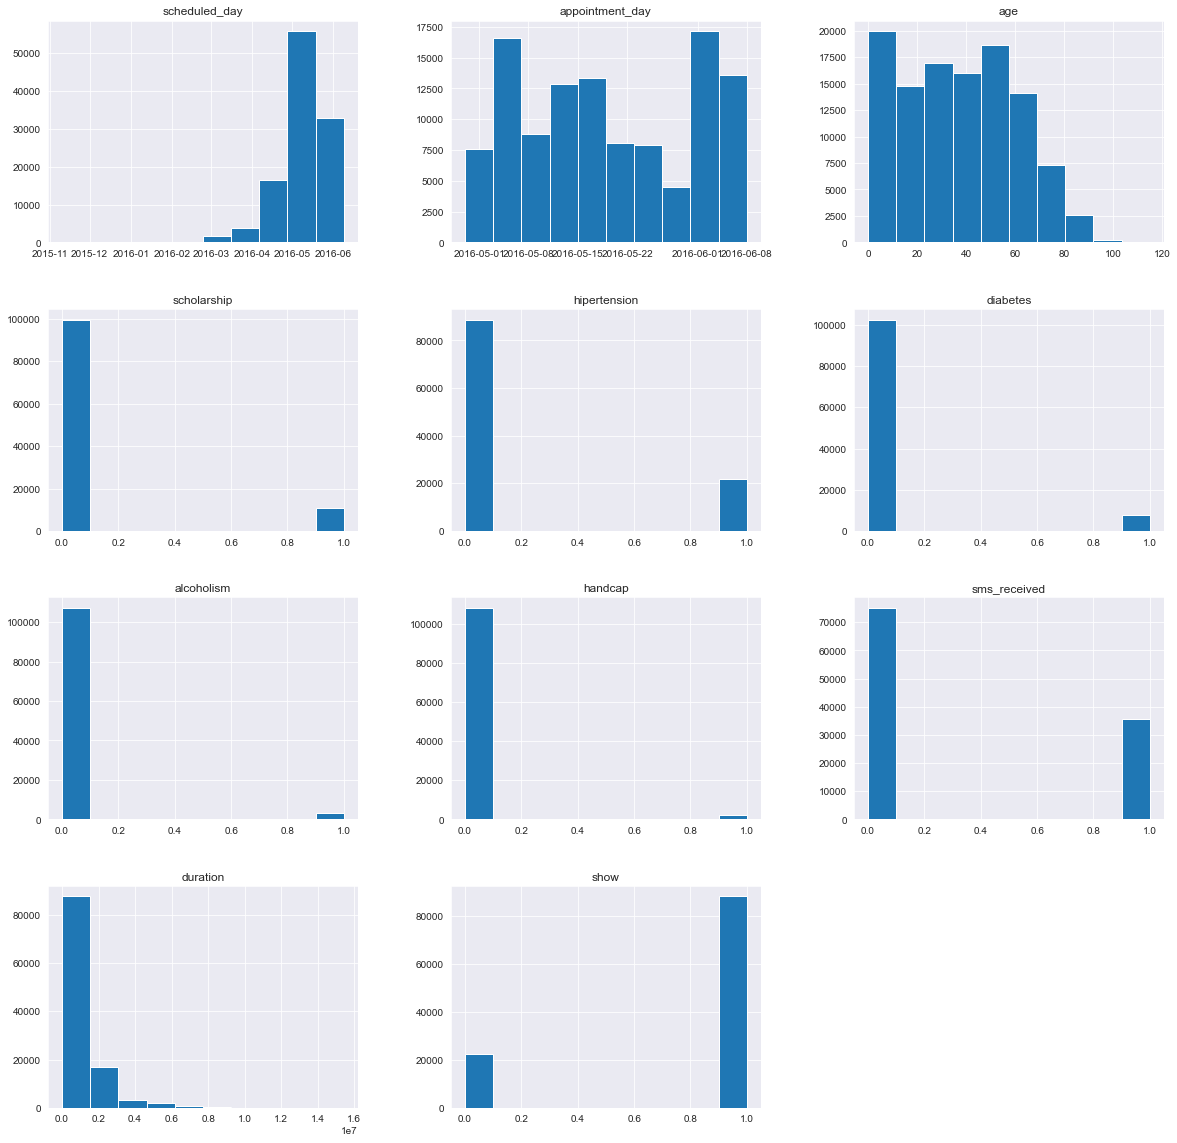

In [23]:
# plot dataframe histogram
df.hist(figsize=(20,20));

The histogram plots indicate:
>1. Age: mode is at zero (1-12 months) years old.
>2. Most of patients are enrolled in scholarship, without hipertension, diabetes, Alcholism and Handcap.
>3. Most of petients don't receive SMS message.
>4. Duration is very skewed to right with mode in 0 duration.
>5. Most of patients show up their appointment.

Mask for easy filtering the data for analysis

In [24]:
#make mask with 'show' column values for easy filter
show=df.show==True
no_show=df.show==False

#### Define functions for plot to re-use
1. histogram plot

In [25]:
# This function will return plot histogram with specified column
#inputs:
    #col_name: Dataframe column name (dataframe)
    #show: the mask filter with show column with True value (pandas seires)
    #no_shiw:the mask filter with show column with false value (pandas seires)
#Outputs:
    #histogram plot
def plot_hist(col_name, show, no_show):
    col_name[show].hist(alpha=0.5,figsize=(6,6), label='show', color='g')
    col_name[no_show].hist(alpha=0.5,figsize=(6,6), label='no show', color='r')
    plt.legend();

2. bar plot

In [26]:
#This function used to return two bars plot for comaprsion
#inputs:
    #show: represent the bar for show value=1 (pandas series)
    #no-show:represent the bar for show value=0 (pandas series)
    #length: x-axis length (int)
    #ylable: y-axis label (string)
    #xlabel: x-axis label (string)
    #title: plot title (string)
    #xtick_labels: array of each bar lable (array)
#outputs:
    #two bars at one plot
def plot_bar(show, no_show, length, ylabel, xlabel, title, xtick_labels):
    ind = np.arange(len(length))  # the x locations for the groups
    width = 0.35       # the width of the bars
    # plot bars
    green_bars = plt.bar(ind, show, width, color='g', alpha=.7, label='show')
    red_bars = plt.bar(ind + width, no_show, width, color='r', alpha=.7, label='no show')

    # title and labels
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    locations = ind + width / 2  # xtick locations
    labels = xtick_labels  # xtick labels
    plt.xticks(locations, labels)

    # legend
    plt.legend();

#### To analysis the showing up factors, so we check individuallt the following factors:
>1. The correlation with SMS receiving message.
>2. The correlation with duration (Difference between the appointment day and the scheduled day).
>3. The correlation with the 'age'.
>4. The correlation with the gender.
>5. The correlation with the scholarship.
>6. The correlation with the Hipertension.
>7. The correlation with the Diabetes.
>8. The correlation with Alcoholism.
>9. The correlation with Handcap.

#### 1. The correlation with SMS receiving message.

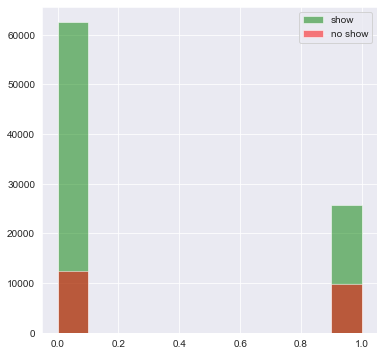

In [27]:
plot_hist(df.sms_received, show, no_show)

The histogram shows the patients are showing up their appointment however they don't receive a message and in fact it's also with higher percentage than received. This indicates that there is other parameter lead to this.

Before going to get this reason, let's see this propotion in calculations below and graph: 

In [28]:
#get the proportion of show and SMS_received
show_sms_pro=df.groupby('show')['sms_received'].value_counts()[1]*100/df['sms_received'].value_counts()
no_show_sms_pro=df.groupby('show')['sms_received'].value_counts()[0]*100/df['sms_received'].value_counts()
print('The % of patients that not receiving sms and showing up is ({} %), while no show is ({} %).'.format(round(show_sms_pro[0],2), round(no_show_sms_pro[0],2)))
print('The % of patients that receiving sms and showing up is ({} %), while no show is ({} %).'.format(round(show_sms_pro[1],2), round(no_show_sms_pro[1],2)))

The % of patients that not receiving sms and showing up is (83.3 %), while no show is (16.7 %).
The % of patients that receiving sms and showing up is (72.43 %), while no show is (27.57 %).


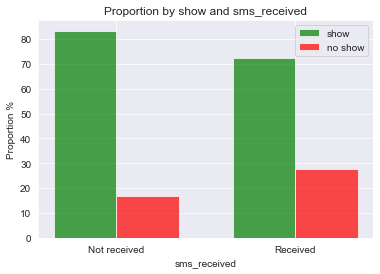

In [29]:
#ploting the bar chart
plot_bar(show_sms_pro, no_show_sms_pro, df.sms_received.unique(),'Proportion %', 'sms_received', 'Proportion by show and sms_received', ['Not received', 'Received'])

The graph shows the pateints who not received SMS messgae has higher proportion in showing up their appointment than received

#### 2. The correlation with duration (Difference between the appointment day and the scheduled day).


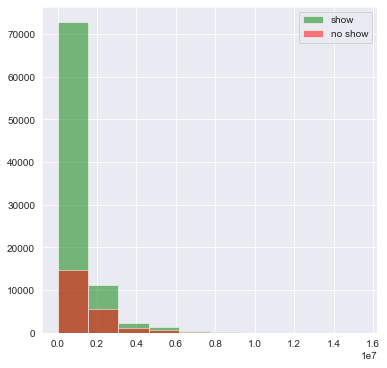

In [30]:
#plot the histogram
plot_hist(df.duration, show, no_show)

There is strongly high relation of patient who showing up their appointment at lower duration levels. 

So, now let's check again the sms_received because it may no sms at lower duration which has high showing up:

In [31]:
#get the mean of show at lower duration with sms received and not received
df.query('duration <200000 and sms_received==0')['show'].mean(),df.query('duration <200000 and sms_received==1')['show'].mean()

(0.909862538894797, nan)

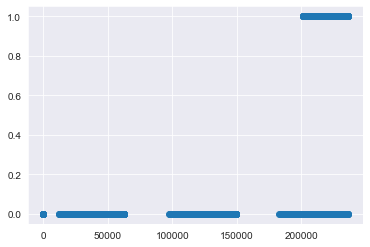

In [32]:
#check the scatter diagram of sms received at lower duration
df_lower_duration=df.query('duration <250000')
plt.scatter(df_lower_duration.duration,df_lower_duration.sms_received);

So, now it's clearly indicates that there is no received sms at the lower duration which increase the showing up because of the correlation showing up and duration 

#### 3. The correlation with the 'age'.

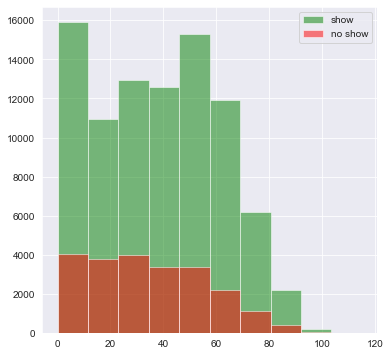

In [33]:
#plot the histogram
plot_hist(df.age, show, no_show)

All ages have showing up higher than no, so there is no correlation.

#### 4. The correlation with the gender.

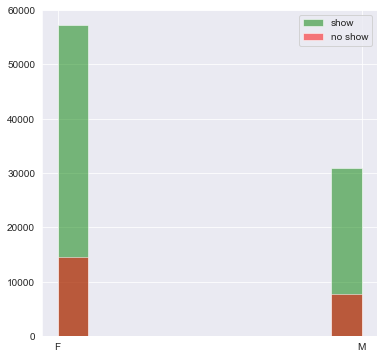

In [34]:
plot_hist(df.gender, show, no_show)

Both are showing up more than no. The reason of the high count in females may due to high females in the samples than males, so this lead us to check the proportion as following:

In [35]:
#get the gender proportion with show and no show
show_gender_pro=df.groupby('show')['gender'].value_counts()[1]/df['gender'].value_counts()
no_show_gender_pro=df.groupby('show')['gender'].value_counts()[0]/df['gender'].value_counts()
show_gender_pro, no_show_gender_pro

(gender
 F    0.796885
 M    0.800362
 Name: gender, dtype: float64,
 gender
 F    0.203115
 M    0.199638
 Name: gender, dtype: float64)

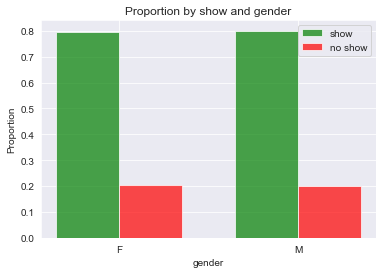

In [36]:
#plot bar
plot_bar(show_gender_pro, no_show_gender_pro, df.gender.unique(),'Proportion', 'gender', 'Proportion by show and gender', ['F','M'])

Now is clearly indicates that both are equal in showing up, so there is no correlation here.

#### 5. The correlation with the scholarship.

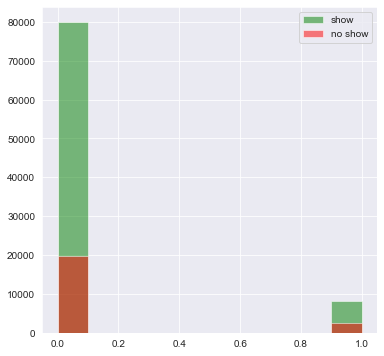

In [37]:
#plot histogram
plot_hist(df.scholarship, show, no_show)

In [38]:
#get the scholarship proportion with show and no show
show_scholarship_pro=df.groupby('show')['scholarship'].value_counts()[1]/df['scholarship'].value_counts()
no_show_scholarship_pro=df.groupby('show')['scholarship'].value_counts()[0]/df['scholarship'].value_counts()
show_scholarship_pro, no_show_scholarship_pro

(scholarship
 0    0.801967
 1    0.762637
 Name: scholarship, dtype: float64,
 scholarship
 0    0.198033
 1    0.237363
 Name: scholarship, dtype: float64)

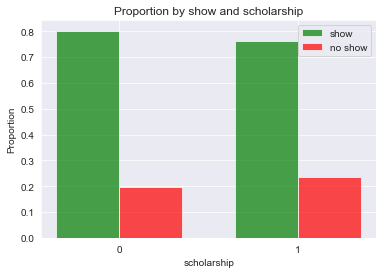

In [39]:
#plot bar
plot_bar(show_scholarship_pro, no_show_scholarship_pro, df.scholarship.unique(),'Proportion', 'scholarship', 'Proportion by show and scholarship', ['0','1'])

Actually without scholarshio is showing up slightly higher with it. This may because durtaion, so there is no correlation here.

#### 6. The correlation with the Hipertension.

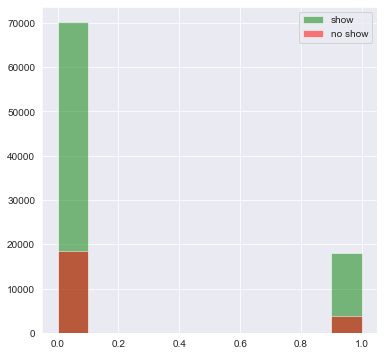

In [40]:
# plot histogram
plot_hist(df.hipertension, show, no_show)

In [41]:
#get the hipertension proportion with show and no show
show_hipertension_pro=df.groupby('show')['hipertension'].value_counts()[1]/df['hipertension'].value_counts()
no_show_hipertension_pro=df.groupby('show')['hipertension'].value_counts()[0]/df['hipertension'].value_counts()
show_hipertension_pro, no_show_hipertension_pro

(hipertension
 0    0.791005
 1    0.826980
 Name: hipertension, dtype: float64,
 hipertension
 0    0.208995
 1    0.173020
 Name: hipertension, dtype: float64)

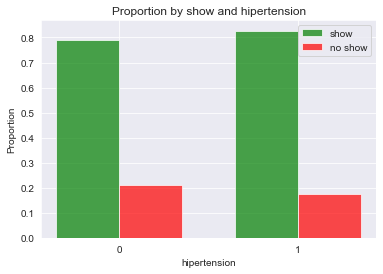

In [42]:
#plot bar
plot_bar(show_hipertension_pro, no_show_hipertension_pro, df.hipertension.unique(),'Proportion', 'hipertension', 'Proportion by show and hipertension', ['0','1'])

Actually with hipertension is showing up slightly higher without it. This may because other relation (i.e duration), so there is no correlation here.

#### 7. The correlation with the Diabetes.

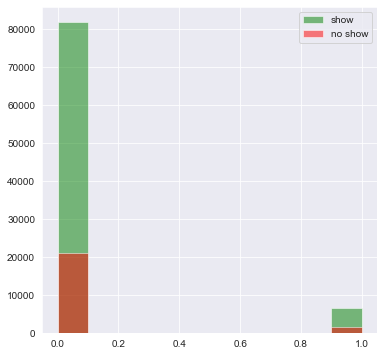

In [43]:
#plot the histogram
plot_hist(df.diabetes, show, no_show)

In [44]:
#get the diabetes proportion with show and no show
show_diabetes_pro=df.groupby('show')['diabetes'].value_counts()[1]/df['diabetes'].value_counts()
no_show_diabetes_pro=df.groupby('show')['diabetes'].value_counts()[0]/df['diabetes'].value_counts()
show_diabetes_pro, no_show_diabetes_pro

(diabetes
 0    0.796409
 1    0.819967
 Name: diabetes, dtype: float64,
 diabetes
 0    0.203591
 1    0.180033
 Name: diabetes, dtype: float64)

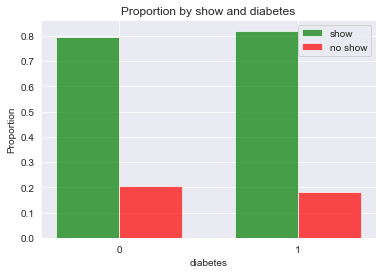

In [45]:
#plot bar
plot_bar(show_diabetes_pro, no_show_diabetes_pro, df.diabetes.unique(),'Proportion', 'diabetes', 'Proportion by show and diabetes', ['0','1'])

Actually with diabetes is showing up slightly higher without it. This may because other relation (i.e duration), so there is no correlation here.

#### 8. The correlation with Alcoholism.

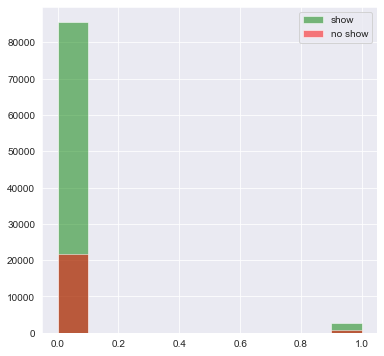

In [46]:
#plot the histogram
plot_hist(df.alcoholism, show, no_show)

In [47]:
#get the alcoholism proportion with show and no show
show_alcoholism_pro=df.groupby('show')['alcoholism'].value_counts()[1]/df['alcoholism'].value_counts()
no_show_alcoholism_pro=df.groupby('show')['alcoholism'].value_counts()[0]/df['alcoholism'].value_counts()
show_alcoholism_pro, no_show_alcoholism_pro

(alcoholism
 0    0.798089
 1    0.798512
 Name: alcoholism, dtype: float64,
 alcoholism
 0    0.201911
 1    0.201488
 Name: alcoholism, dtype: float64)

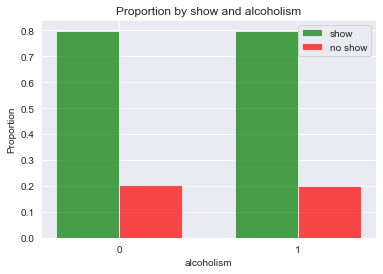

In [48]:
#plot bar
plot_bar(show_alcoholism_pro, no_show_alcoholism_pro, df.alcoholism.unique(),'Proportion', 'alcoholism', 'Proportion by show and alcoholism', ['0','1'])

Both are almost equal, so there is no correlation here

#### 9. The correlation with Handcap.

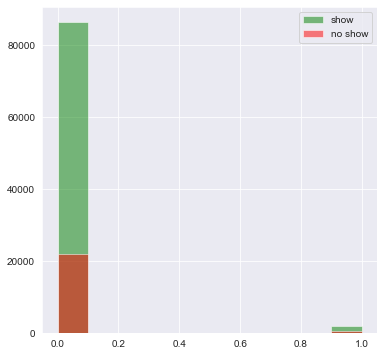

In [49]:
#plot the histogram
plot_hist(df.handcap, show, no_show)

In [50]:
#get the handcap proportion with show and no show
show_handcap_pro=df.groupby('show')['handcap'].value_counts()[1]/df['handcap'].value_counts()
no_show_handcap_pro=df.groupby('show')['handcap'].value_counts()[0]/df['handcap'].value_counts()
show_handcap_pro, no_show_handcap_pro

(handcap
 0    0.797667
 1    0.819116
 Name: handcap, dtype: float64,
 handcap
 0    0.202333
 1    0.180884
 Name: handcap, dtype: float64)

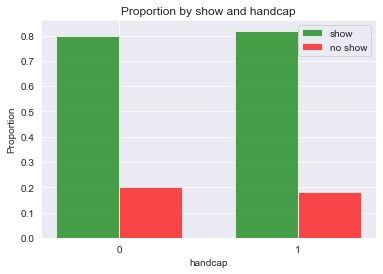

In [51]:
#plot bar
plot_bar(show_handcap_pro, no_show_handcap_pro, df.handcap.unique(),'Proportion', 'handcap', 'Proportion by show and handcap', ['0','1'])

Actually with handcap is showing up slightly higher without it. This may because other relation (i.e duration), so there is no correlation here.

<a id='conclusions'></a>
## Conclusions

> The project is going insteps in order to answer the question: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>
> **1. Data wrangling**
>> **Steps used:**
>>1. Load the data and visualize the first rows.
>>2. Check for missing values (NaN), correct datatypes and column names.
>>3. Check for duplicated samples (rows).
>>4. Check unique values per each column and compare it with the Data dictionary.
>>5. Check the age column values between 0 and 100.
>>6. Check if scheduled day is always earlier than appointment date.
>>7. Check if the age between 0-2 years and the patient is classified as Alcoholism.
>>8. Check if the patient_id has always unique gender.

> **2. Data cleaning**
>> **Steps used:**
>> 1. Set 'handcap' column value to 1 if value more than 1.
>> 2. For negative duration, drop 5 rows and set duration to 0 for the others.
>> 3. Drop negative value of age (1 row).
>> 4. Drop no needed columns for this analysis (patient_id, appointment_id).

> **3. Data analysis**
>> **Steps used:**
>> 1. The correlation with SMS receiving message.
>> 2. The correlation with duration (Difference between the appointment day and the scheduled day).
>> 3. The correlation with the 'age'.
>> 4. The correlation with the gender.
>> 5. The correlation with the scholarship.
>> 6. The correlation with the Hipertension.
>> 7. The correlation with the Diabetes.
>> 8. The correlation with Alcoholism.
>> 9. The correlation with Handcap.

> **4. Results**
>> **1. The patinet showing up their appointment is strongly dependent on duration. With lower duration high showing and vice versa. There is no correlation with the other factors (age, scholarship, gender, hipertension, diabetes, alcoholins and handcap.**

> **5. limitations**
>> 1. Appointment date is always registered at zero hour of day begining. It could be better to registered on time to get results without assumptions.
>> 2. Handcap to be more categorized because not all have same effect.

> **6. Additional research**
>> Weather condition can be added as additional data to collect because may be showing up the appointment depends on.